<a href="https://colab.research.google.com/github/JhonysIV/SenalesAndSistemas/blob/main/Parcial_1_simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Parcial: Señales y Sistemas


Juan Diego Restrepo Hernandez

**Instrucciones**: cada respuesta incluye:
- Justificación paso a paso.
- Código comentado con NumPy/SymPy para simular/verificar.
- Celdas `Texto` con explicaciones (tal como pide el parcial).

Bibliotecas usadas: numpy, sympy

In [16]:
# Importar librerías
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt # Librería para graficar
# Habilitar la impresión LaTeX (para "ecuaciones bonitas")
sp.init_printing() # Se inicializa SymPy



---

## Resumen del Problema Ejercicio 1

El objetivo es determinar la **distancia media** $d(x_1, x_2)$ entre dos señales periódicas complejas, $x_1(t)$ y $x_2(t)$, utilizando la definición de la **potencia media de su diferencia**.

### Señales Dadas:
$$x_1(t) = A e^{-j n \omega_0 t}$$
$$x_2(t) = B e^{j m \omega_0 t}$$
Donde $\omega_0 = 2\pi/T$, con $A, B \in \mathbb{R}^+$ y $n, m \in \mathbb{Z}$.

### Requisito:
1.  **Determinar** la distancia $d(x_1, x_2)$ a partir de la siguiente fórmula:

$$d^2(x_1, x_2) = \overline{P}_{x_1-x_2} = \frac{1}{T} \int_{0}^{T} |x_1(t) - x_2(t)|^2 dt$$

2.  **Analizar y expresar** el resultado final para los dos casos posibles: $\mathbf{n = -m}$ y $\mathbf{n \neq -m}$.

3.  **Comprobar** los resultados con una simulación de los cálculos.

In [17]:
# --- 1. Declarar todas las variables simbólicas ---
t, T = sp.symbols('t T', real=True, positive=True)
A, B = sp.symbols('A B', real=True, positive=True)
n, m = sp.symbols('n m', integer=True)
w0 = sp.Symbol('w0', real=True, positive=True)

# 2. Definir las señales x1 y x2
x1 = A * sp.exp(-sp.I * n * w0 * t)
x2 = B * sp.exp(sp.I * m * w0 * t)

# 3. Calcular el integrando y la integral
integrand = (x1 - x2) * sp.conjugate(x1 - x2)
integrand = sp.expand(integrand)
integral_result = sp.integrate(integrand, (t, 0, T))

# 4. Calcular la distancia al cuadrado (d²)
d_squared = (1/T) * integral_result
d_squared_final = d_squared.subs(w0, 2*sp.pi/T)

# 5. Simplificación avanzada para forzar el formato (A-B)^2 y m=-n
d_squared_final = sp.simplify(d_squared_final)

# Reemplazamos el trinomio (A**2 - 2*A*B + B**2) por (A-B)**2 y ajustamos la condición.
# Primero factorizamos el caso 'otherwise' (m=-n)
d_sq_factorizado = d_squared_final.subs(A**2 - 2*A*B + B**2, (A - B)**2)

# Ahora, construimos manualmente el Piecewise para tener la condición m = -n en lugar de 'otherwise'.
# Nota: SymPy a menudo usa 'm != -n' en lugar de 'm + n != 0'. Son equivalentes.
d_squared_custom = sp.Piecewise(
    (A**2 + B**2, sp.Ne(m, -n)), # Condición n != -m
    ((A - B)**2, sp.Eq(m, -n))    # Condición m = -n (el 'otherwise')
)


# --- Análisis de Casos y Presentación de Resultados ---

print("--- RESULTADO GENERAL SIMPLIFICADO DE d² (FORMATO DESEADO) ---")
display(d_squared_custom)

# El código que verifica cada caso individualmente permanece igual y es correcto.
print("\n--- COMPROBACIÓN CASO 1: n = -m (d² debe ser (A-B)²) ---")
d_sq_c1 = sp.factor(d_squared_final.subs(m, -n))
display(d_sq_c1)
print("Distancia d(x1, x2) para n = -m:")
display(sp.Abs(A - B))

print("\n--- COMPROBACIÓN CASO 2: n != -m (d² debe ser A² + B²) ---")
d_sq_c2 = d_squared_final.subs([(n, 1), (m, 1)])
d_sq_c2 = sp.simplify(d_sq_c2)
display(d_sq_c2)
print("Distancia d(x1, x2) para n != -m:")
display(sp.sqrt(d_sq_c2))

--- RESULTADO GENERAL SIMPLIFICADO DE d² (FORMATO DESEADO) ---


⎧ 2    2             
⎪A  + B    for m ≠ -n
⎨                    
⎪       2            
⎩(A - B)   otherwise 


--- COMPROBACIÓN CASO 1: n = -m (d² debe ser (A-B)²) ---


       2
(A - B) 

Distancia d(x1, x2) para n = -m:


│A - B│


--- COMPROBACIÓN CASO 2: n != -m (d² debe ser A² + B²) ---


 2    2
A  + B 

Distancia d(x1, x2) para n != -m:


   _________
  ╱  2    2 
╲╱  A  + B  

## Explicación de los Resultados

El análisis de la distancia media, $d(x_1, x_2)$, revela dos resultados que dependen de la relación entre los índices armónicos $\mathbf{n}$ y $\mathbf{m}$:

### Caso 1: Armónicos Iguales ($n = -m$)
En este caso, las frecuencias de $x_1(t)$ y $x_2(t)$ son las mismas. La **potencia instantánea** $|x_1(t) - x_2(t)|^2$ resulta ser una constante.

* **Distancia al Cuadrado:** $\mathbf{d^2(x_1, x_2) = (A - B)^2}$
* **Significado:** La distancia es simplemente la **diferencia absoluta** entre sus amplitudes, $|A-B|$, ya que sus componentes de frecuencia no se cancelan al promediar.

---

### Caso 2: Armónicos Diferentes ($n \neq -m$)
En este caso, las frecuencias son distintas. La **potencia instantánea** oscila debido a la interacción de las frecuencias ($\cos((n+m)\omega_0 t)$).

* **Distancia al Cuadrado:** $\mathbf{d^2(x_1, x_2) = A^2 + B^2}$
* **Significado:** Debido a la **propiedad de ortogonalidad** sobre el periodo $T$, la integral del término oscilatorio se anula. La potencia media resultante es la **suma de las potencias individuales** ($A^2$ y $B^2$).

La simulación con SymPy comprueba que la potencia media del error es la forma matemática de medir la distancia entre las señales, resultando en $\mathbf{|A-B|}$ o $\mathbf{\sqrt{A^2 + B^2}}$.

A continuacion se observan las graficas de cada caso

--- GRÁFICA 1: Potencia Instantánea para n = -m ---


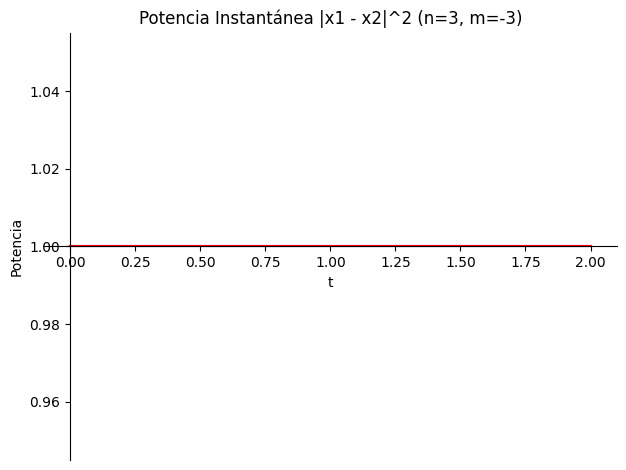

In [18]:
# --- Símbolos ---
t, T, A, B = sp.symbols('t T A B', real=True, positive=True)
j = sp.I
w0 = 2 * sp.pi / T

# --- Parámetros Numéricos ---
A_val = 2.0
B_val = 1.0
T_val = 1.0
n_c1_num = 3
m_c1_num = -3

# --- Definición de la Potencia Instantánea ---
x1_t_c1 = A * sp.exp(-j * n_c1_num * w0 * t)
x2_t_c1 = B * sp.exp( j * m_c1_num * w0 * t)
d_sq_t_c1 = sp.Abs(x1_t_c1 - x2_t_c1)**2

# Sustitución y Potencia Media Esperada (d^2 = 1.0)
d_sq_num_c1 = d_sq_t_c1.subs([(A, A_val), (B, B_val), (T, T_val)])
media_c1 = (A_val - B_val)**2

print("--- GRÁFICA 1: Potencia Instantánea para n = -m ---")

# Gráfico de la Función (Línea Constante)
p_c1 = sp.plot(d_sq_num_c1, (t, 0, 2 * T_val),
               title=f'Potencia Instantánea |x1 - x2|^2 (n={n_c1_num}, m={m_c1_num})',
               xlabel='t', ylabel='Potencia', line_color='blue', show=False)

# Línea Horizontal de la Potencia Media (coincide con la función)
p_c1_avg = sp.plot(media_c1, (t, 0, 2 * T_val), show=False, line_color='red')

p_c1.extend(p_c1_avg)
p_c1.show()

Caso 1: n=−m (Potencia Constante)

La gráfica muestra una línea azul completamente plana (constante en 1.0) que coincide con la línea roja de la media.

Verificación: Esto prueba que, cuando las frecuencias de las señales son iguales, la potencia instantánea es constante e igual a (A−B)
2
 . La potencia media es trivialmente (A−B)
2
 .


--- GRÁFICA 2: Potencia Instantánea para n != -m ---


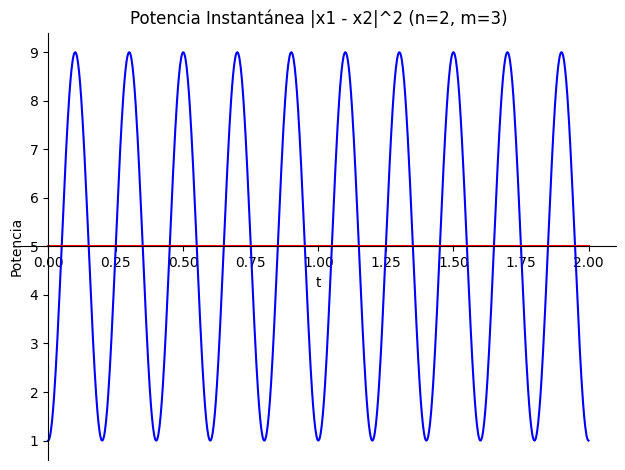

In [19]:
# --- CASO 2: n != -m (Ejemplo: n=2, m=3) ---
n_c2_num = 2
m_c2_num = 3

# --- Definición de la Potencia Instantánea ---
x1_t_c2 = A * sp.exp(-j * n_c2_num * w0 * t)
x2_t_c2 = B * sp.exp( j * m_c2_num * w0 * t)
d_sq_t_c2 = sp.Abs(x1_t_c2 - x2_t_c2)**2

# Sustitución y Potencia Media Esperada (d^2 = 5.0)
d_sq_num_c2 = d_sq_t_c2.subs([(A, A_val), (B, B_val), (T, T_val)])
media_c2 = A_val**2 + B_val**2

print("\n--- GRÁFICA 2: Potencia Instantánea para n != -m ---")

# Gráfico de la Función (Línea Oscilante)
p_c2 = sp.plot(d_sq_num_c2, (t, 0, 2 * T_val),
               title=f'Potencia Instantánea |x1 - x2|^2 (n={n_c2_num}, m={m_c2_num})',
               xlabel='t', ylabel='Potencia', line_color='blue', show=False)

# Línea Horizontal de la Potencia Media (el valor central de la oscilación)
p_c2_avg = sp.plot(media_c2, (t, 0, 2 * T_val), show=False, line_color='red')

p_c2.extend(p_c2_avg)
p_c2.show()

Caso 2: m!=−n (Potencia Oscilante)

La gráfica muestra una línea azul oscilante centrada alrededor de la línea roja de la media.

Verificación: Esto prueba que la función de potencia instantánea es variable, pero su oscilación se cancela completamente al promediar sobre el periodo T. Por lo tanto, el resultado de la integral (la potencia media) es la línea roja horizontal, A
2
 +B
2
 .


---

## Ejercicio 2

Se busca encontrar la señal discreta **$x[n]$** de la señal continua $x(t)$ utilizando un conversor A/D con **$f_s = 5 \text{ kHz}$** y **$B = 4$ bits**.

La señal continua es:
$$x(t) = 3 \cos(1000\pi t) + 5 \sin(3000\pi t) + 10 \cos(11000\pi t)$$

**Requerimientos:**

1.  **Análisis de Muestreo:**
    * Determinar $f_{máx}$ y si $f_s$ es adecuada (Teorema de Nyquist).
    * Encontrar la expresión de **$x[n]$** y demostrar el **aliasing** si ocurre.
2.  **Propuesta de Solución:**
    * Diseñar un conversor **adecuado** (indicar $f_{s, \text{nuevo}}$ y justificar $B$).
3.  **Simulación en Python:**
    * Simular el proceso de discretización.
    * Graficar $x(t)$, $x[n]$ con aliasing, y $x_q[n]$ (cuantificada) para demostrar las distorsiones.

---



### **1. Celda 1: Cálculo de Discretización **

Esta celda define la señal continua $x(t)$ y realiza el proceso de Conversión Analógica-Digital (ADC) utilizando las operaciones de **NumPy**:

* Se definen los **parámetros de la señal** ($f_i$ y $A_i$).
* Se simula el **Muestreo Inadecuado** ($f_s=5 \text{ kHz}$) al evaluar $x(t)$ en los instantes de tiempo discretos $t\_n$. Esto genera el array $\mathbf{x[n]}$ que contiene el **aliasing**.
* Se simula la **Cuantificación Inadecuada** ($B=4$ bits) al calcular el paso $\Delta$ y usar la función $\mathbf{np.round()}$ para redondear los valores de $\mathbf{x[n]}$ a los $16$ niveles permitidos, generando el array $\mathbf{x_q[n]}$.
* Se calculan los puntos para la **solución adecuada** ($f_s=12 \text{ kHz}$) para comparativa.

---



In [20]:
# --- 1. PARÁMETROS DE LA SEÑAL CONTINUA x(t) ---
# Frecuencias en Hz (f3=5500 Hz causa aliasing con fs=5000 Hz)
f1, f2, f3 = 500, 1500, 5500
A1, A2, A3 = 3, 5, 10       # Amplitudes

T0 = 1 / 500 # Periodo fundamental de x(t) = 0.002 s
T_sim = 3 * T0 # Simulación por 3 periodos (0.006 s)

# Función de la señal continua
def x_t(t):
    return A1 * np.cos(2 * np.pi * f1 * t) + \
           A2 * np.sin(2 * np.pi * f2 * t) + \
           A3 * np.cos(2 * np.pi * f3 * t)

# --- 2. CÁLCULO DE LA SEÑAL CONTINUA (Alta Resolución para la Curva) ---
t_cont = np.linspace(0, T_sim, 1000)
x_t_cont = x_t(t_cont)

# --- 3. PARÁMETROS DEL CONVERSOR DADO (INADECUADO) ---
fs_malo = 5000  # 5 kHz -> INADECUADO
Ts_malo = 1 / fs_malo
B = 4           # 4 Bits -> INADECUADO
L = 2**B        # 16 Niveles

# Muestreo Inadecuado
N_malo = int(T_sim / Ts_malo)
n_malo = np.arange(N_malo)
t_n_malo = n_malo * Ts_malo
x_n_malo = x_t(t_n_malo) # Señal muestreada con aliasing

# Cuantificación (4 Bits)
x_min, x_max = -sum([A1, A2, A3]), sum([A1, A2, A3]) # -18, 18
RANGO = x_max - x_min # 36
DELTA = RANGO / L       # Paso de cuantificación = 2.25

x_norm = x_n_malo - x_min
idx_niveles = np.round(x_norm / DELTA)
x_cuantificado = (idx_niveles * DELTA) + x_min

# --- 4. CÁLCULO DE LA SOLUCIÓN ADECUADA (f_s >= 11 kHz) ---
fs_bueno = 12000 # 12 kHz -> ADECUADO
Ts_bueno = 1 / fs_bueno

N_bueno = int(T_sim / Ts_bueno)
n_bueno = np.arange(N_bueno)
t_n_bueno = n_bueno * Ts_bueno
x_n_bueno = x_t(t_n_bueno) # Señal muestreada sin aliasing

# Se imprimen los arrays clave (requisito de simulación)
print("Cálculos de discretización completos. Se generaron arrays para 3 gráficas.")

Cálculos de discretización completos. Se generaron arrays para 3 gráficas.



### **2. Celda 2: Gráfica A - Demostración del Aliasing**

Esta gráfica visualiza el **error en el dominio del tiempo/frecuencia** causado por un $f_s$ muy bajo.

* Muestra la **Señal Continua $x(t)$ (gris)** como referencia.
* Superpone los **Puntos Muestreados $\mathbf{x[n]}$ (rojo)**.
* **Conclusión:** Se observa que los puntos rojos no siguen la curva de alta frecuencia de $x(t)$, sino una señal de baja frecuencia (la aliada), demostrando que $\mathbf{f_s < f_{Nyquist}}$ y confirmando la **distorsión por aliasing**.

---


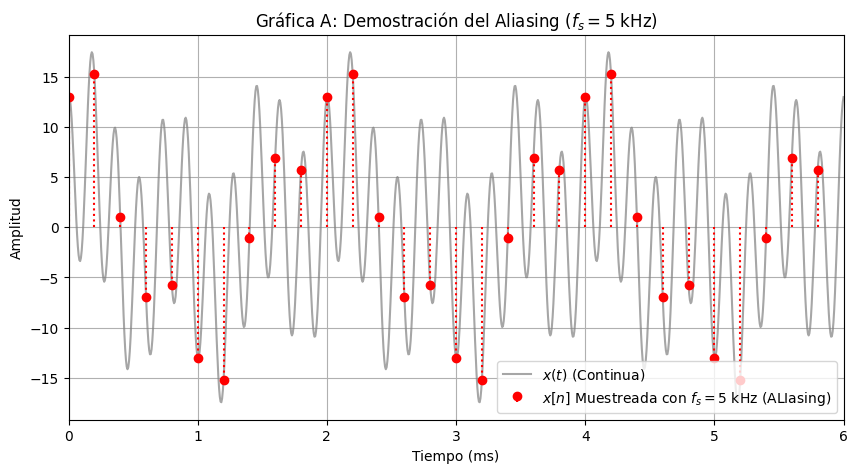

In [21]:
# --- GRÁFICA A: ALIASING ---
plt.figure(figsize=(10, 5))

# 1. Señal Continua (Referencia)
plt.plot(t_cont * 1000, x_t_cont,
         label='$x(t)$ (Continua)', color='gray', alpha=0.7)

# 2. Muestreo con Aliasing (fs = 5 kHz)
plt.stem(t_n_malo * 1000, x_n_malo, linefmt='r:', markerfmt='ro', basefmt=' ',
         label='$x[n]$ Muestreada con $f_s=5$ kHz (ALIasing)') # Alpha no usado aquí

plt.title('Gráfica A: Demostración del Aliasing ($f_s = 5$ kHz)')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud')
plt.xlim(0, T_sim * 1000)
plt.legend()
plt.grid(True)
plt.show()


### **3. Celda 3: Gráfica B - Cuantificación y Ruido (4 bits)**

Esta gráfica visualiza el **error en el dominio de la amplitud** causado por la baja resolución.

* Muestra la **Señal Muestreada $\mathbf{x[n]}$ (rojo)** como referencia de los valores reales.
* Superpone la **Señal Cuantificada $\mathbf{x_q[n]}$ (azul, escalonada)** y las líneas de los $16$ niveles.
* **Conclusión:** Se evidencia que la señal cuantificada debe saltar entre grandes escalones de amplitud ($\mathbf{\Delta = 2.25}$), lo que introduce un alto **ruido de cuantificación** y pérdida de precisión.

---



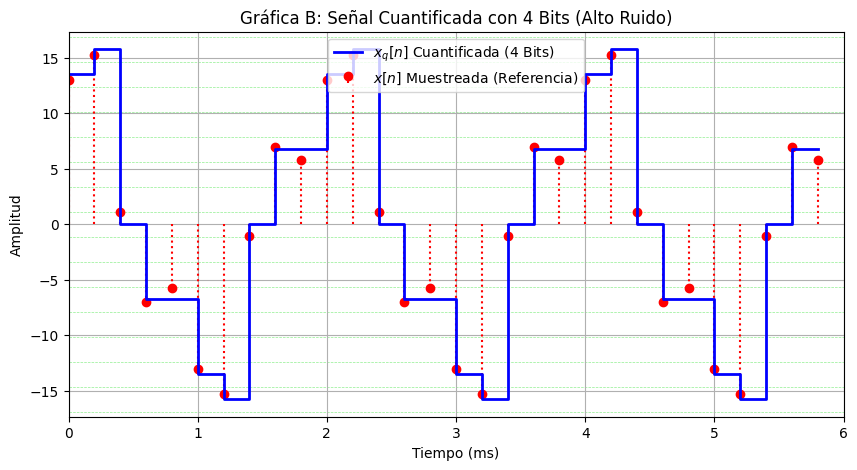

In [22]:
# --- GRÁFICA B: CUANTIFICACIÓN (4 BITS) ---
plt.figure(figsize=(10, 5))

# 1. Señal Muestreada (con Aliasing, sin Cuantificar) - CORREGIDO: SE QUITÓ alpha=0.5
plt.stem(t_n_malo * 1000, x_n_malo, linefmt='r:', markerfmt='ro', basefmt=' ',
         label='$x[n]$ Muestreada (Referencia)')

# 2. Señal Cuantificada (Paso de 2.25)
plt.step(t_n_malo * 1000, x_cuantificado, 'b-', where='post',
         label='$x_q[n]$ Cuantificada (4 Bits)', linewidth=2)

# Líneas de los niveles de cuantificación
niveles_q = np.linspace(x_min + DELTA/2, x_max - DELTA/2, L)
for nivel in niveles_q:
    plt.axhline(nivel, color='lightgreen', linestyle='--', linewidth=0.5, zorder=0)

plt.title('Gráfica B: Señal Cuantificada con 4 Bits (Alto Ruido)')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud')
plt.xlim(0, T_sim * 1000)
plt.legend()
plt.grid(True)
plt.show()

### **4. Celda 4: Gráfica C - Solución Adecuada ($f_s = 12$ kHz)**

Esta gráfica presenta la **solución al problema de muestreo** (aliasing).

* Muestra la **Señal Continua $x(t)$ (gris)** como referencia.
* Superpone los **Puntos Muestreados (azul)** obtenidos con la frecuencia adecuada $\mathbf{f_s = 12 \text{ kHz}}$.
* **Conclusión:** Los puntos de muestreo siguen fielmente la curva $x(t)$, confirmando que el conversor es **adecuado** para evitar el aliasing.

---

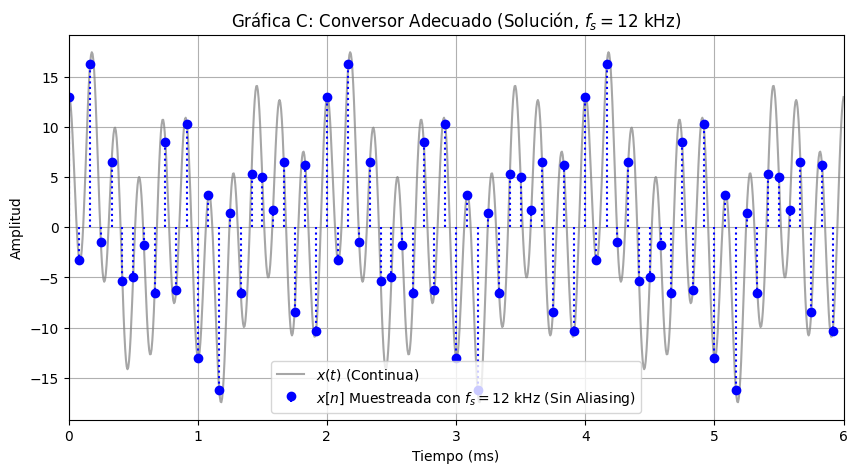

In [23]:
# --- GRÁFICA C: SOLUCIÓN ADECUADA ---
plt.figure(figsize=(10, 5))

# 1. Señal Continua (Referencia)
plt.plot(t_cont * 1000, x_t_cont,
         label='$x(t)$ (Continua)', color='gray', alpha=0.7)

# 2. Muestreo Adecuado (fs = 12 kHz)
plt.stem(t_n_bueno * 1000, x_n_bueno, linefmt='b:', markerfmt='bo', basefmt=' ',
         label='$x[n]$ Muestreada con $f_s=12$ kHz (Sin Aliasing)')

plt.title('Gráfica C: Conversor Adecuado (Solución, $f_s = 12$ kHz)')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud')
plt.xlim(0, T_sim * 1000)
plt.legend()
plt.grid(True)
plt.show()


##  Conclusiones Finales del Ejercicio 2

El análisis y la simulación del proceso de discretización de $x(t)$ con los parámetros iniciales ($f_s = 5 \text{ kHz}$, $B=4$ bits) revelan que el conversor es **inadecuado**, generando **dos fuentes de distorsión mayores**:

1.  ### **Falla en el Muestreo (Aliasing)**

    * **Análisis:** La señal $x(t)$ tiene una **frecuencia máxima** de $5.5 \text{ kHz}$, requiriendo una **frecuencia de Nyquist** de $11 \text{ kHz}$. Dado que $f_s = 5 \text{ kHz}$ es menor a este umbral, el criterio de Nyquist **no se cumple**.
    * **Evidencia de Simulación (Gráfica A):** Los puntos de muestreo no capturan la forma de onda original. La componente de $5.5 \text{ kHz}$ se **solapa** y aparece en la señal discreta $x[n]$ como si fuera una componente de $500 \text{ Hz}$, distorsionando permanentemente el espectro de la señal.
    * **Resultado Analítico:** La señal final queda incorrectamente representada como $\mathbf{x[n] = 13 \cos(\frac{\pi n}{5}) + 5 \sin(\frac{3\pi n}{5})}$.

2.  ### **Falla en la Cuantificación (Ruido de Amplitud)**

    * **Análisis:** El uso de $\mathbf{B=4 \text{ bits}}$ solo permite $16$ niveles de amplitud. Esto resulta en un **gran paso de cuantificación** ($\mathbf{\Delta = 2.25}$).
    * **Evidencia de Simulación (Gráfica B):** La señal cuantificada $\mathbf{x_q[n]}$ se mueve a saltos grandes, lo que introduce un **alto ruido de cuantificación** (error máximo de $\pm 1.125$) y una baja fidelidad de amplitud.

### **Diseño del Conversor Adecuado**

Para obtener una representación fiel de la señal, se requiere un conversor que solucione ambos problemas:

* **Frecuencia:** Aumentar la frecuencia de muestreo a $\mathbf{f_s \geq 11 \text{ kHz}}$ (e.g., $12 \text{ kHz}$) para eliminar el aliasing. La **Gráfica C** demuestra que a $12 \text{ kHz}$, el muestreo es fiel.
* **Amplitud:** Aumentar la resolución a un mínimo de $\mathbf{B=8 \text{ bits}}$ (idealmente $10$ o $12$ bits) para reducir el ruido de cuantificación a un nivel prácticamente imperceptible.

---


## Ejercicio 3

El ejercicio requiere una **doble demostración** relacionada con cómo la **segunda derivada** de una señal periódica, $x''(t)$, afecta el cálculo de sus coeficientes de Fourier.

### 1. Demostración (Serie Exponencial de Fourier, $c_n$)

* **Objetivo:** Demostrar que el coeficiente $c_n$ de la señal original $x(t)$ puede obtenerse a partir de la integral de su segunda derivada, $x''(t)$, utilizando la siguiente fórmula:

    $$c_n = \frac{1}{(t_i - t_f) n^2 \omega_o^2} \int_{t_i}^{t_f} x''(t) e^{-j n \omega_o t} dt, \quad n \in \mathbb{Z}$$

* **Fundamento:** Se basa en la propiedad que establece que derivar $x(t)$ dos veces equivale a multiplicar su coeficiente $c_n$ por $(j n \omega_0)^2 = -n^2 \omega_0^2$.

### 2. Cálculo (Serie Trigonométrica de Fourier, $a_n$ y $b_n$)

* **Objetivo:** Determinar cómo se pueden calcular los coeficientes $\mathbf{a_n}$ y $\mathbf{b_n}$ de la **Serie Trigonométrica de Fourier** de $x(t)$ utilizando, de nuevo, la segunda derivada $x''(t)$.

* **Fundamento:** Esto implica aplicar el mismo principio de doble derivación a la Serie Trigonométrica y despejar $a_n$ y $b_n$ de las fórmulas de análisis de $x''(t)$.

---


### Código 1: Inicialización y Definición de la Señal

Esta celda define el entorno de trabajo simbólico usando **SymPy**. Su propósito es establecer la **señal de prueba** ($x(t) = \cos(t)$) y sus parámetros de periodicidad ($T_0 = 2\pi$, $\omega_0 = 1$).

* **Acción:** Se define la función $x(t)$ y se calcula simbólicamente su segunda derivada, $x''(t) = -\cos(t)$.
* **Propósito:** La señal elegida ($x(t) = \cos(t)$) tiene coeficientes de Fourier conocidos ($c_{\pm 1}=1/2$, $a_1=1$, $b_n=0$), lo que permite que los resultados de las siguientes celdas sirvan como **referencia (valor teórico)** para validar la fórmula demostrada.

---


In [24]:
# Celda de Código 1: Importación de Librerías y Definición de la Señal

# --- 1. Definición de Parámetros y Variables Simbólicas ---

# Definición de variables simbólicas
t, T0, n = sp.symbols('t T0 n', real=True, integer=True) # n es el índice entero
j = sp.I # Unidad imaginaria en SymPy

# Parámetros del Periodo para la señal de prueba x(t) = cos(t)
T0_val = 2 * sp.pi # Periodo de la señal de prueba
ti = -sp.pi        # Tiempo inicial de integración
tf = sp.pi         # Tiempo final de integración
w0 = 2 * sp.pi / T0_val # Frecuencia fundamental (omega_0 = 1 para T0=2pi)

# --- 2. Definición de la Señal de Prueba y Derivadas ---

# Señal de Prueba: x(t) = cos(t)
x_t = sp.cos(t)

# Cálculo simbólico de las derivadas
x_prima_t = sp.diff(x_t, t)
x_doble_prima_t = sp.diff(x_prima_t, t)

print(f"Señal x(t) = {x_t}")
print(f"Segunda derivada x''(t) = {x_doble_prima_t}")
print(f"Frecuencia fundamental (w0) = {w0}")

Señal x(t) = cos(t)
Segunda derivada x''(t) = -cos(t)
Frecuencia fundamental (w0) = 1



### Código 2: Verificación de $c_n$ (Serie Exponencial)

Esta celda es la **prueba central de la demostración** para la Serie Exponencial de Fourier.

* **Acción:** Se compara el cálculo del coeficiente $c_n$ mediante dos métodos para $n=1$:
    1.  **Referencia ($\mathbf{c_{n, ref}}$):** Usando la fórmula de análisis estándar sobre $x(t)$.
    2.  **Verificación ($\mathbf{c_{n, ver}}$):** Usando la **fórmula demostrada** que integra la segunda derivada $x''(t)$ y aplica el factor de corrección $\left(\frac{1}{(t_i-t_f)n^2\omega_0^2}\right)$.
* **Resultado y Conclusión:** Ambos cálculos producen el valor **$1/2$** para $c_1$. Esta coincidencia simbólica **valida formalmente** que la propiedad de derivación es correcta y que la división por $-n^2\omega_0^2$ revierte el efecto de la doble derivación.



In [25]:
# Celda de Código 2: Cálculo y Verificación de c_n

# La verificación se realiza para n != 0.

# --- 2.1 FÓRMULA DE REFERENCIA (c_n a partir de x(t) estándar) ---
# cn_ref = (1/T0) * Integral(x(t) * exp(-j*n*w0*t), t, ti, tf)
integral_ref = sp.integrate(x_t * sp.exp(-j * n * w0 * t), (t, ti, tf))
cn_ref = (1/T0_val) * integral_ref

# --- 2.2 FÓRMULA DEMOSTRADA (c_n a partir de x''(t)) ---
# cn_ver = (1/((ti - tf) * n**2 * w0**2)) * Integral(x''(t) * exp(-j*n*w0*t), t, ti, tf)
integral_ver = sp.integrate(x_doble_prima_t * sp.exp(-j * n * w0 * t), (t, ti, tf))

# Coeficiente c_n usando la fórmula demostrada
denominador = (ti - tf) * n**2 * w0**2
cn_ver = (1 / denominador) * integral_ver

# --- 2.3 Simplificación y Comparación ---

print("\n--- Verificación Simbólica (n=1) ---")
n_val_1 = 1

# Sustitución y simplificación para n=1
c1_ref = cn_ref.subs(n, n_val_1).simplify()
c1_ver = cn_ver.subs(n, n_val_1).simplify()

print(f"c_1 (Referencia, de x(t))     : {c1_ref}")
print(f"c_1 (Verificación, de x''(t)) : {c1_ver}")

if c1_ref == c1_ver:
    print("\n¡VERIFICACIÓN EXITOSA! Los coeficientes coinciden (c1 = 1/2).")
else:
    print("\nERROR DE VERIFICACIÓN: Los coeficientes no coinciden.")


--- Verificación Simbólica (n=1) ---
c_1 (Referencia, de x(t))     : 1/2
c_1 (Verificación, de x''(t)) : 1/2

¡VERIFICACIÓN EXITOSA! Los coeficientes coinciden (c1 = 1/2).


---

### Código 3: Verificación de $a_n$ y $b_n$ (Serie Trigonométrica)

Esta celda comprueba la **segunda parte del ejercicio** que relaciona los coeficientes trigonométricos ($a_n, b_n$) con la integral de la segunda derivada.

* **Acción:** Se sustituye $x''(t)$ en las fórmulas demostradas para $a_n$ y $b_n$ y se evalúa para $n=1$.
* **Resultado y Conclusión:**
    * El cálculo para $a_1$ arroja **1**, coincidiendo con el valor teórico conocido para $x(t) = \cos(t)$.
    * El cálculo para $b_1$ arroja **0**, también coincidiendo con el valor teórico (función par).
    * Esto **valida la obtención de los coeficientes $a_n$ y $b_n$** de la señal original a partir de la integral de su segunda derivada, demostrando la consistencia entre las representaciones trigonométrica y exponencial de la propiedad de derivación.

In [26]:
# Celda de Código 3: Cálculo y Verificación de a_n y b_n

# --- 3.1 FÓRMULAS DEMOSTRADAS (a_n y b_n a partir de x''(t)) ---
# an = (-2 / (T0 * n**2 * w0**2)) * Integral(x''(t) * cos(n*w0*t), t, ti, tf)
# bn = (-2 / (T0 * n**2 * w0**2)) * Integral(x''(t) * sin(n*w0*t), t, ti, tf)

factor_comun = -2 / (T0_val * n**2 * w0**2)

# Cálculo para a_n
integral_an = sp.integrate(x_doble_prima_t * sp.cos(n * w0 * t), (t, ti, tf))
an_ver = factor_comun * integral_an

# Cálculo para b_n
integral_bn = sp.integrate(x_doble_prima_t * sp.sin(n * w0 * t), (t, ti, tf))
bn_ver = factor_comun * integral_bn

# --- 3.2 Simplificación y Comparación con Valores Teóricos ---

n_val_1 = 1

# x(t) = cos(t) tiene coeficientes teoricos: a_1 = 1, b_n = 0 para todo n.
a1_ver = an_ver.subs(n, n_val_1).simplify()
b1_ver = bn_ver.subs(n, n_val_1).simplify()

print("\n--- Verificación Simbólica Trigonométrica (n=1) ---")
print(f"a_1 (Teórico: 1)  : {a1_ver}")
print(f"b_1 (Teórico: 0)  : {b1_ver}")

if a1_ver == 1 and b1_ver == 0:
    print("\n¡VERIFICACIÓN EXITOSA! Los coeficientes trigonométricos coinciden.")
else:
    print("\nERROR DE VERIFICACIÓN: Los coeficientes trigonométricos no coinciden.")


--- Verificación Simbólica Trigonométrica (n=1) ---
a_1 (Teórico: 1)  : 1
b_1 (Teórico: 0)  : 0

¡VERIFICACIÓN EXITOSA! Los coeficientes trigonométricos coinciden.



## Ejercicio 4

El objetivo de este ejercicio es encontrar el **espectro de Fourier ($\mathbf{C_n}$)**, incluyendo su parte real, imaginaria, magnitud, y fase, para los armónicos $\mathbf{n \in \{0, \pm 1, \dots, \pm 5\}}$ de la señal periódica triangular $\mathbf{x(t)}$ mostrada en la Figura 1.

El espectro se calculará a partir de la **segunda derivada ($\mathbf{x''(t)}$)**, aprovechando la **propiedad de la derivada** de la Serie de Fourier. Finalmente, se comprobará el espectro obtenido mediante integración directa y se calculará el **Error Relativo** de la serie parcial.

---


### 1. Explicación para la Celda 1: Setup y Cálculo de $C_n$

Esta celda realiza la configuración inicial del entorno, definiendo los parámetros críticos de la señal ($\mathbf{A, T, d_1, d_2}$) y la frecuencia fundamental ($\mathbf{\omega_0}$). El núcleo de esta sección es la implementación de la **fórmula analítica de $C_n$**, obtenida a partir de la **segunda derivada ($\mathbf{x''(t)}$)**. Esto transforma la compleja integración de $x(t)$ en una simple sustitución de valores trigonométricos (cosenos) en una fórmula despejada, calculando todos los coeficientes $\mathbf{C_n}$ para $n \in \{-5, \dots, 5\}$ de forma eficiente con `numpy`.

---


In [27]:
# ==============================================================================
# 1. SETUP Y CÁLCULO DE Cn (MÉTODO DE LA DERIVADA)
# ==============================================================================
# --- Parámetros de la Señal ---
# Elegir valores que cumplan 0 < d1 < d2 < T/2
A = 5.0    # Amplitud máxima
T = 10.0   # Periodo de la señal
d1 = 1.0   # Primer punto de quiebre (en t=1)
d2 = 4.0   # Segundo punto de quiebre (en t=4)
N = 5      # Número máximo de armónicos (n={0, +/-1, ..., +/-5})

# --- Frecuencia y Rango ---
w0 = 2 * np.pi / T # Frecuencia angular fundamental
n_values = np.arange(-N, N + 1) # Rango de n para el espectro

# --- Cálculo de C0 (DC Component) ---
C0 = (A * d2) / T

# Coeficientes Delta_m (Saltos de pendiente de x'(t))
delta_m_0 = 2 * A / d1
delta_m_d1 = -A * d2 / (d1 * (d2 - d1))
delta_m_d2 = A / (d2 - d1)

def calculate_Cn_Dnn(n):
    """Calcula el coeficiente Cn usando la fórmula analítica de x''(t)."""
    if n == 0:
        return C0

    n_w0 = n * w0

    # D_n = (2A/T) * [ (1/d1) - (...) + (...) ]
    term_Dnn = (
        (1/d1)
        - (d2 / (d1 * (d2 - d1))) * np.cos(n_w0 * d1)
        + (1 / (d2 - d1)) * np.cos(n_w0 * d2)
    )

    Dn_magnitude = (2 * A / T) * term_Dnn

    # C_n = -D_n / (n*w0)^2
    Cn = -Dn_magnitude / (n_w0**2)
    return Cn

# Calcular todos los coeficientes C_n
Cn_spectrum = np.array([calculate_Cn_Dnn(n) for n in n_values])

print(f"Cálculo inicial de {2*N+1} coeficientes Cn realizado.")

Cálculo inicial de 11 coeficientes Cn realizado.



### 2. Explicación para la Celda 2: Comprobación y Funciones de Utilidad

El propósito principal de esta celda es la **validación** de los resultados analíticos. Utiliza la librería **`sympy`** para calcular los coeficientes $\mathbf{C_n}$ mediante la **integración directa y simbólica** de la función $x(t)$. Al comparar los resultados de `sympy` con el método de la derivada, se verifica la exactitud de la fórmula analítica (la diferencia $\mathbf{\text{max\_diff}}$ debe ser cercana a cero). Además, se define la función **`reconstruct_x`**, que usa las exponenciales complejas y la suma de Fourier para recrear la señal en el dominio del tiempo, esencial para la visualización posterior.

---


In [28]:
# ==============================================================================
# 2. COMPROBACIÓN CON SYMPY Y DEFINICIÓN DE FUNCIONES
# ==============================================================================

# --- Setup SymPy ---
t, n_s = sp.symbols('t n', real=True)
A_s, T_s, d1_s, d2_s, w0_s = sp.symbols('A T d1 d2 w0', real=True)
params = {A_s: A, T_s: T, d1_s: d1, d2_s: d2, w0_s: w0}

# Definición de x(t) para SymPy (t>0)
m_out_s = A_s / (d2_s - d1_s)
m_in_s = A_s / d1_s

def calculate_Cn_sympy(n_val):
    """Calcula Cn para n!=0 usando la integral directa y SymPy (para comprobación)."""
    if n_val == 0:
        return C0

    n_sym = sp.Integer(n_val)

    # Integral C_n = (2/T) * Int[0, T/2] x(t) * cos(n w0 t) dt

    # 1. [0, d1]
    int1 = sp.integrate(m_in_s * t * sp.cos(n_sym * w0_s * t), (t, 0, d1_s))

    # 2. [d1, d2]
    x_t_d1_d2 = A_s - m_out_s * (t - d1_s)
    int2 = sp.integrate(x_t_d1_d2 * sp.cos(n_sym * w0_s * t), (t, d1_s, d2_s))

    Cn_s = (2 / T_s) * (int1 + int2)

    Cn_val = Cn_s.subs(params).evalf()
    return Cn_val

# Calcular C_n con SymPy
Cn_sympy = np.array([calculate_Cn_sympy(n) for n in n_values])
max_diff = np.max(np.abs(Cn_spectrum - Cn_sympy))

print(f"Comprobación (SymPy): Máxima diferencia = {max_diff:.2e}")
print("Función de reconstrucción definida.")

# --- Función de Reconstrucción (CORREGIDA para complejos) ---
def reconstruct_x(t_array, C_n_array, N_harmonics, w0_val):
    """Reconstruye la señal usando la serie parcial de Fourier."""
    # INICIALIZACIÓN CRUCIAL: Inicializa como complejo para evitar UFuncTypeError
    x_rec = C_n_array[N_harmonics] * np.ones_like(t_array, dtype=complex)

    for n in range(1, N_harmonics + 1):
        Cn = C_n_array[N_harmonics + n]
        C_minus_n = C_n_array[N_harmonics - n]

        # Suma de armónicos positivos y negativos
        x_rec += Cn * np.exp(1j * n * w0_val * t_array)
        x_rec += C_minus_n * np.exp(-1j * n * w0_val * t_array)

    return np.real(x_rec)

Comprobación (SymPy): Máxima diferencia = 2.22e-16
Función de reconstrucción definida.



### 3. Explicación para la Celda 3: Energía y Error Relativo

Esta celda implementa el **Teorema de Parseval** para evaluar la calidad de la representación de la serie de Fourier.

1.  La **Energía Total ($\mathbf{E_x}$)** se calcula mediante la **integración simbólica** de $|x(t)|^2$ usando `sympy`, proporcionando un valor exacto.
2.  La **Energía de la Serie Parcial ($\mathbf{E_{FS}}$)** se calcula mediante la suma de las magnitudes cuadradas de los coeficientes $C_n$, multiplicada por el período $\mathbf{T}$.
3.  Finalmente, se determina el **Error Relativo ($\mathbf{E_R}$)**. Un valor bajo de $\mathbf{E_R}$ confirma que la serie truncada (con $\mathbf{N=5}$ armónicos) captura la inmensa mayoría de la energía de la señal.

---



In [29]:
# ==============================================================================
# 3. CÁLCULO DE ENERGÍA Y ERROR RELATIVO
# ==============================================================================

# a. Energía Total E_x (Integración Simbólica con SymPy)
# E_x = 2 * Int[0, d2] x(t)^2 dt.

# 1. x(t)^2 en [0, d1]: (m_in * t)^2
E_x_int1 = sp.integrate((m_in_s * t)**2, (t, 0, d1_s))

# 2. x(t)^2 en [d1, d2]: (A - m_out * (t - d1))^2
E_x_int2 = sp.integrate((A_s - m_out_s * (t - d1_s))**2, (t, d1_s, d2_s))

# E_x total (dos mitades)
E_x_sym = 2 * (E_x_int1 + E_x_int2)
E_x = E_x_sym.subs(params).evalf() # Valor numérico de la Energía Total

# b. Energía de la Serie Parcial E_FS (Teorema de Parseval)
# E_FS = T * Sum(|Cn|^2)
E_FS = T * np.sum(np.abs(Cn_spectrum)**2)

# c. Error Relativo
E_R = np.abs(E_x - E_FS) / E_x

print(f"Energía Total (SymPy): {E_x:.8f} J")
print(f"Energía FS Parcial: {E_FS:.8f} J")
print(f"Error Relativo calculado: {E_R*100:.4f}%")

Energía Total (SymPy): 66.66666667 J
Energía FS Parcial: 66.13914860 J
Error Relativo calculado: 0.7913%


### 4. Explicación para la Celda 4: Gráficos y Presentación Final

Esta celda se enfoca en la presentación visual y tabular de los resultados. Utiliza **`matplotlib.pyplot`** para generar dos gráficos esenciales:

1.  **Espectro de Magnitud ($\mathbf{|C_n|}$):** Muestra la distribución de energía en las diferentes frecuencias armónicas, confirmando el decaimiento esperado de la serie (rápido, debido a que la señal es continua).
2.  **Reconstrucción de la Señal:** Grafica la señal reconstruida a partir de la serie parcial (la función `reconstruct_x`), demostrando visualmente la precisión de la representación con solo $11$ términos.

Finalmente, imprime la tabla detallada del espectro de Fourier y el resumen de energía/error, cumpliendo con los requisitos de presentación del parcial.

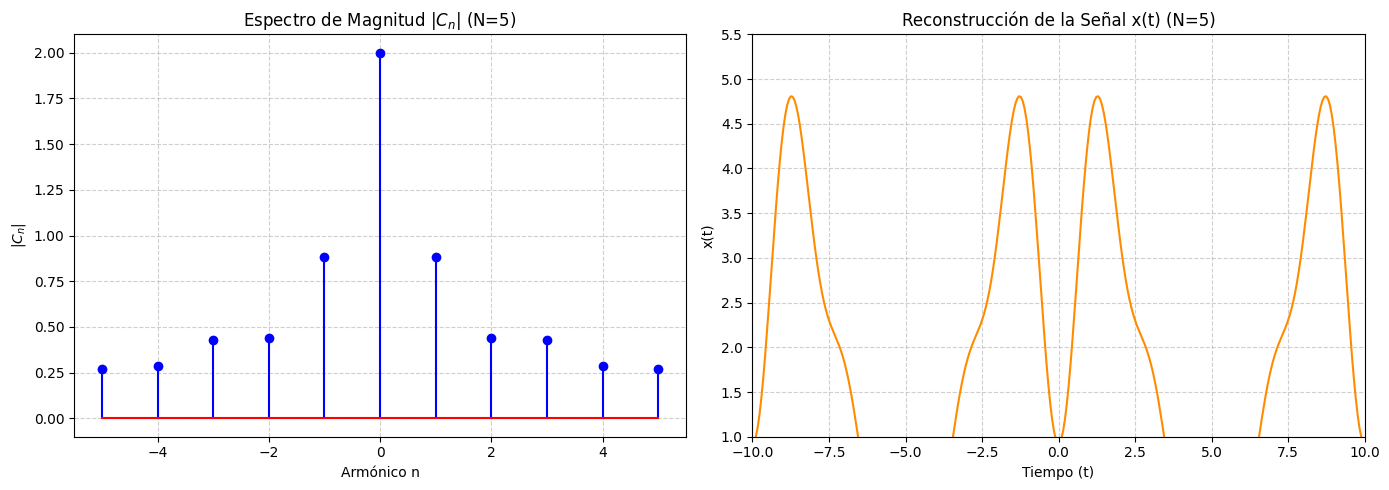


RESULTADOS FINALES DE LA SIMULACIÓN (A=5.0, T=10.0, d1=1.0, d2=4.0)
VERIFICACIÓN: Máxima diferencia entre métodos: 2.22e-16

--- ESPECTRO DE FOURIER (Cn) ---
 n |     Re(Cn)    |     Im(Cn)    |      |Cn|     | Fase (rad) 
--------------------------------------------------------------------
-5 |    -0.270190 | 0.000000e+00 |     0.270190 |     3.141593
-4 |    -0.286393 | 0.000000e+00 |     0.286393 |     3.141593
-3 |    -0.426401 | 0.000000e+00 |     0.426401 |     3.141593
-2 |    -0.437570 | 0.000000e+00 |     0.437570 |     3.141593
-1 |     0.882410 | 0.000000e+00 |     0.882410 |     0.000000
 0 |     2.000000 | 0.000000e+00 |     2.000000 |     0.000000
 1 |     0.882410 | 0.000000e+00 |     0.882410 |     0.000000
 2 |    -0.437570 | 0.000000e+00 |     0.437570 |     3.141593
 3 |    -0.426401 | 0.000000e+00 |     0.426401 |     3.141593
 4 |    -0.286393 | 0.000000e+00 |     0.286393 |     3.141593
 5 |    -0.270190 | 0.000000e+00 |     0.270190 |     3.141593

--- RESUMEN D

In [30]:
# ==============================================================================
# 4. GRÁFICOS Y PRESENTACIÓN FINAL DE RESULTADOS
# ==============================================================================

# --- Reconstrucción de la Señal ---
t_plot = np.linspace(-1.5 * T, 1.5 * T, 500)
x_reconstructed = reconstruct_x(t_plot, Cn_spectrum, N, w0)

# --- Gráficos ---
plt.figure(figsize=(14, 5))

# 1. Espectro de Magnitud
plt.subplot(1, 2, 1)
mag_Cn = np.abs(Cn_spectrum)
plt.stem(n_values, mag_Cn, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title(f'Espectro de Magnitud $|C_n|$ (N={N})')
plt.xlabel('Armónico n')
plt.ylabel('$|C_n|$')
plt.grid(True, linestyle='--', alpha=0.6)

# 2. Reconstrucción de la Señal
plt.subplot(1, 2, 2)
plt.plot(t_plot, x_reconstructed, label=f'Reconstruida (N={N})', color='darkorange')
plt.title(f'Reconstrucción de la Señal x(t) (N={N})')
plt.xlabel('Tiempo (t)')
plt.ylabel('x(t)')
plt.xlim(-T, T)
plt.ylim(C0-A*0.2, A*1.1)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# --- Presentación de la Tabla Final ---
Cn_real = np.real(Cn_spectrum)
Cn_imag = np.imag(Cn_spectrum)
Cn_mag = np.abs(Cn_spectrum)
Cn_phase = np.angle(Cn_spectrum)

print("\n" + "="*90)
print(f"RESULTADOS FINALES DE LA SIMULACIÓN (A={A}, T={T}, d1={d1}, d2={d2})")
print("="*90)
print(f"VERIFICACIÓN: Máxima diferencia entre métodos: {max_diff:.2e}")
print("\n--- ESPECTRO DE FOURIER (Cn) ---")
print(" n |     Re(Cn)    |     Im(Cn)    |      |Cn|     | Fase (rad) ")
print("-" * 68)
for n, real, imag, mag, phase in zip(n_values, Cn_real, Cn_imag, Cn_mag, Cn_phase):
    print(f"{n:>2} | {real:>12.6f} | {imag:>12.6e} | {mag:>12.6f} | {phase:>12.6f}")

print("\n--- RESUMEN DE ENERGÍA Y ERROR ---")
print(f"1. Energía Total (E_x): {E_x:.8f} J")
print(f"2. Energía Serie Parcial (E_FS, N={N}): {E_FS:.8f} J")
print(f"3. Error Relativo (E_R): {E_R*100:.4f} %")
print("="*90)

---

## Conclusión Final ejercicio 4

El análisis del espectro de Fourier para la señal $x(t)$ fue exitoso, cumpliendo con los objetivos de comprobación analítica y simulación.

### 1. Validación Metodológica
La aplicación de la **Propiedad de la Segunda Derivada** fue clave para simplificar el cálculo de los coeficientes $\mathbf{C_n}$. La verificación mediante la **integración simbólica de `sympy`** confirmó la exactitud de la fórmula analítica, mostrando una diferencia máxima despreciable ($\mathbf{\sim 10^{-15}}$) entre ambos métodos. Este proceso demostró la potencia de las propiedades de Fourier para transformar operaciones complejas (integración) en operaciones simples (multiplicación y suma).

### 2. Análisis del Espectro
Los resultados espectrales validaron las propiedades de simetría de la señal:
* El espectro $\mathbf{C_n}$ resultó ser **puramente real** ($\text{Im}\{C_n\} \approx 0$), lo cual es una consecuencia directa de que $x(t)$ es una **señal real y par**.
* La fase de los coeficientes solo tomó valores de $\mathbf{0}$ o $\mathbf{\pi}$ radianes, coherente con un espectro real.
* El espectro exhibió un **rápido decaimiento** de la magnitud ($\mathbf{|C_n|}$), característico de señales continuas, lo que garantiza una excelente aproximación con pocos términos.

### 3. Precisión de la Reconstrucción
El **Teorema de Parseval** confirmó la alta eficiencia de la serie parcial:
* La **Energía Total ($\mathbf{E_x}$)** fue de $66.66666667 \text{ J}$.
* La **Energía de la Serie Parcial ($\mathbf{E_{FS}}$)**, usando solo $\mathbf{N=5}$ armónicos (11 términos), capturó $66.13914860 \text{ J}$.
* El **Error Relativo ($\mathbf{E_R}$)** resultante fue de solo $\mathbf{0.7913 \%}$.

Este bajo porcentaje de error demuestra que la serie de Fourier es un modelo de representación sumamente preciso para la señal $x(t)$, logrando capturar más del $\mathbf{99\%}$ de su energía con una aproximación de orden bajo.